In [36]:
import math
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
import geocoord_conversion_f as fl #ll_to_os()

In [37]:
sns.set(style="darkgrid")

In [46]:
os.chdir('/Users/sahoko/GitHub/Food-insecurity-GP-forecasting/')
country_list = os.listdir('Data/Foini2023/output_data')
country_list.remove('.DS_Store')
country_list

['Syria', 'Burkina-Faso', 'Yemen', 'Mali', 'Nigeria', 'Niger', 'Cameroon']

In [47]:
for country in country_list:
    df_info_ctry = pd.read_csv('Data/Fioni2023/Missing-data-info/country-info.csv', index_col=0)
    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'.csv'
    df = pd.read_csv(file, header=[0,1])
    st = df.index[df['AdminStrata']['Indicator']== df_info_ctry.loc[country]['startday']][0]
    en = df.index[df['AdminStrata']['Indicator']== df_info_ctry.loc[country]['lastday']][0]
    df = df.iloc[st:en]
    n_row = len(df)
    region_list = df.columns.get_level_values(0)[1:].to_list()
    column_list= df.columns.get_level_values(1)[1:].to_list()
    region_list = (list(dict.fromkeys(region_list)))
    column_list = (list(dict.fromkeys(column_list)))
    n_region = len(region_list)
    ##
    df_long = pd.DataFrame(columns=column_list)
    for region in region_list:
        df_long = pd.concat([df_long, df[region]], axis=0)
    df_long['region'] = list(np.repeat(region_list,len(df)))
    df_long['Datetime'] = list(pd.to_datetime(df['AdminStrata']['Indicator']))*len(region_list)
    
    ##
    East = []
    North = []
    Lat = []
    Lon = []
    for region in region_list:
        lat = df[region]['Lat'].iloc[0]
        lon =df[region]['Lon'].iloc[0]
        E, N = fl.ll_to_os(lat, lon,datum ='wgs84')
        Lat.append(lat)
        Lon.append(lon)
        East.append(E)
        North.append(N)
    ##
    dat = {'Easting':East, 'Northing':North, 'Longitude':Lon, 'Latitude':Lat, 'region':region_list}
    df_geo = pd.DataFrame(dat).set_index('region')
    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'-location.csv'
    df_geo.to_csv(file)
    ##
    df_long['Easting'] = np.repeat(East, n_row)
    df_long['Northing'] = np.repeat(North, n_row)
    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'-long.csv'
    df_long.to_csv(file)
    ##

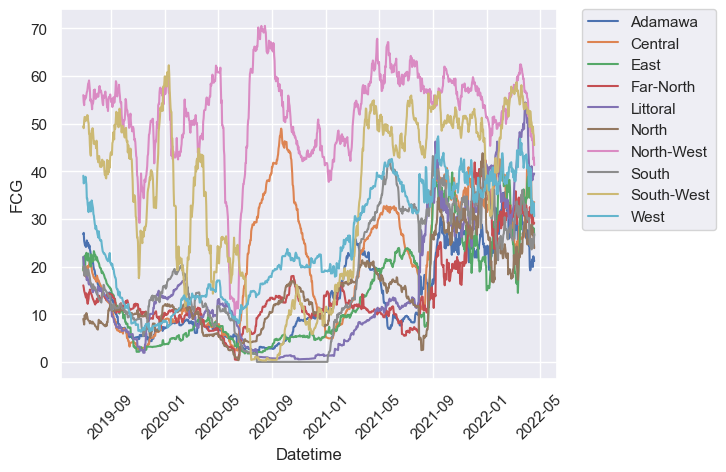

In [48]:
sns.lineplot(data=df_long, x ='Datetime', y='FCG', hue = 'region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()